# Goal:
Develop a model to find the variables that are significant in the demand for shared bikes with

the available independent variables and report appropriate metrics of your model evaluation.

# Importing libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df= pd.read_excel(r"C:\Users\vsmal\test data kattru\day.xlsx")

In [3]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01 00:00:00,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01 00:00:00,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01 00:00:00,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01 00:00:00,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01 00:00:00,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

*There is no any empty in dataset

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


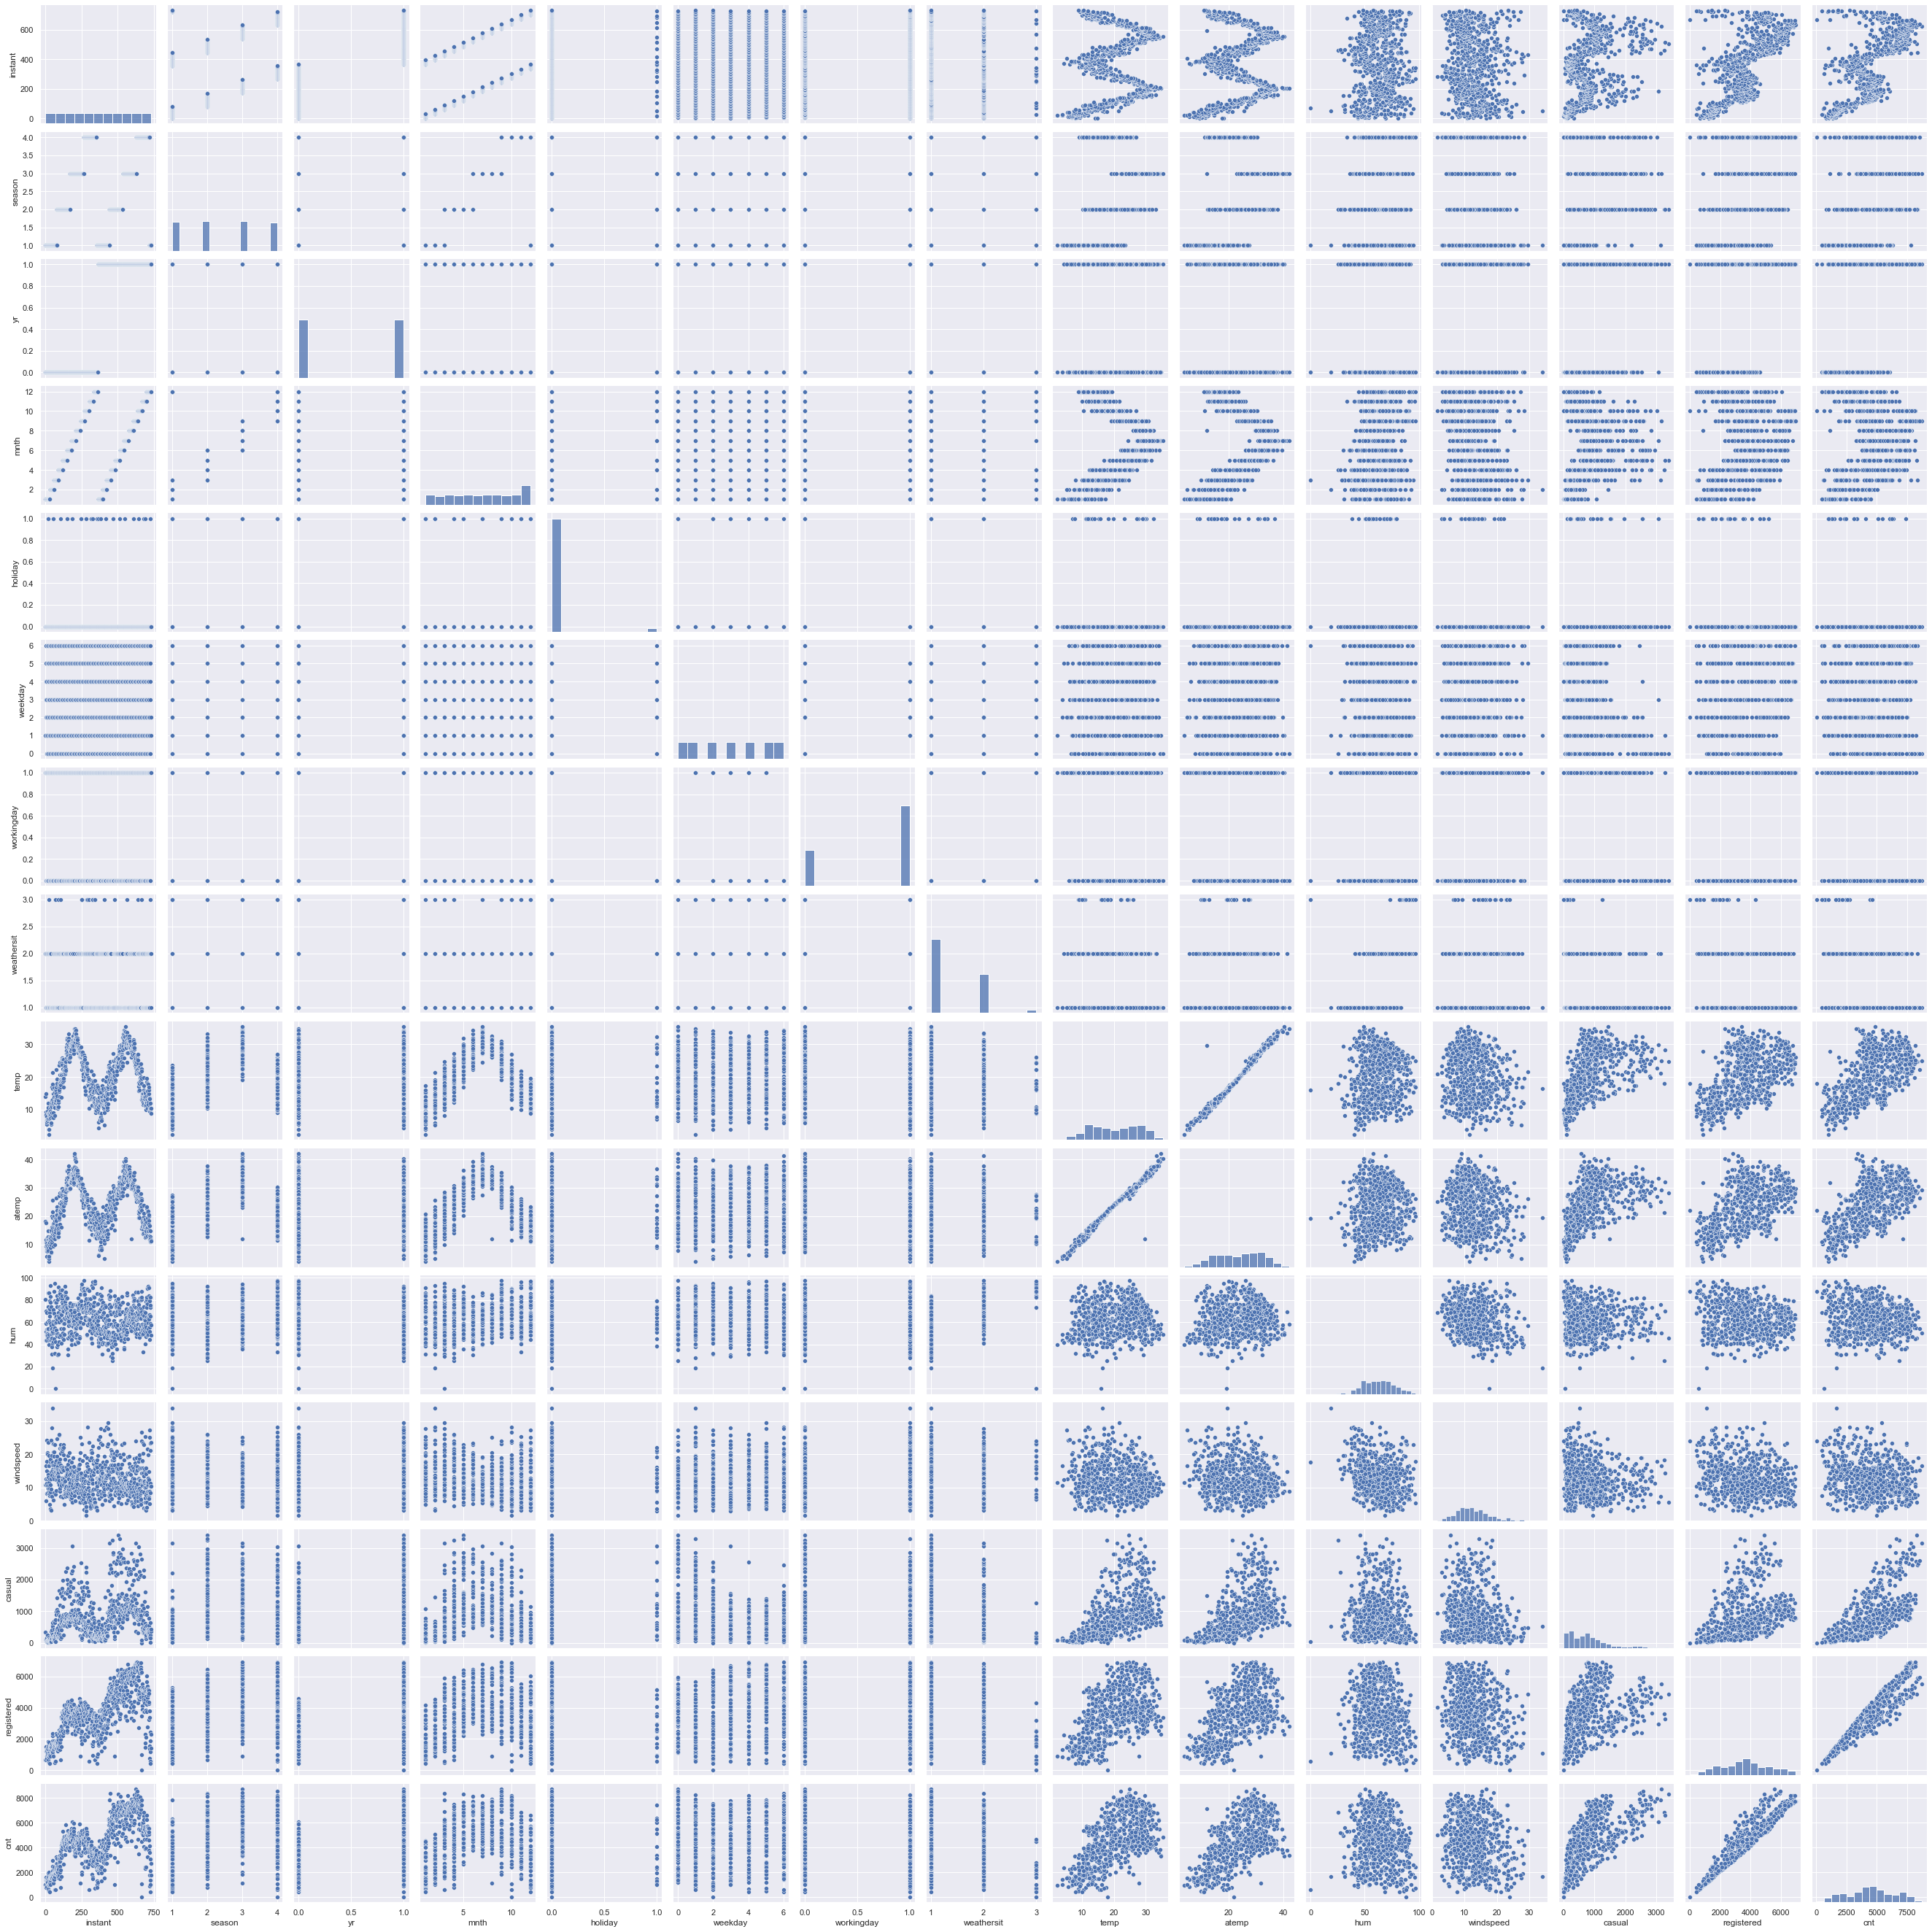

In [25]:
sns.pairplot(df)

# correlation

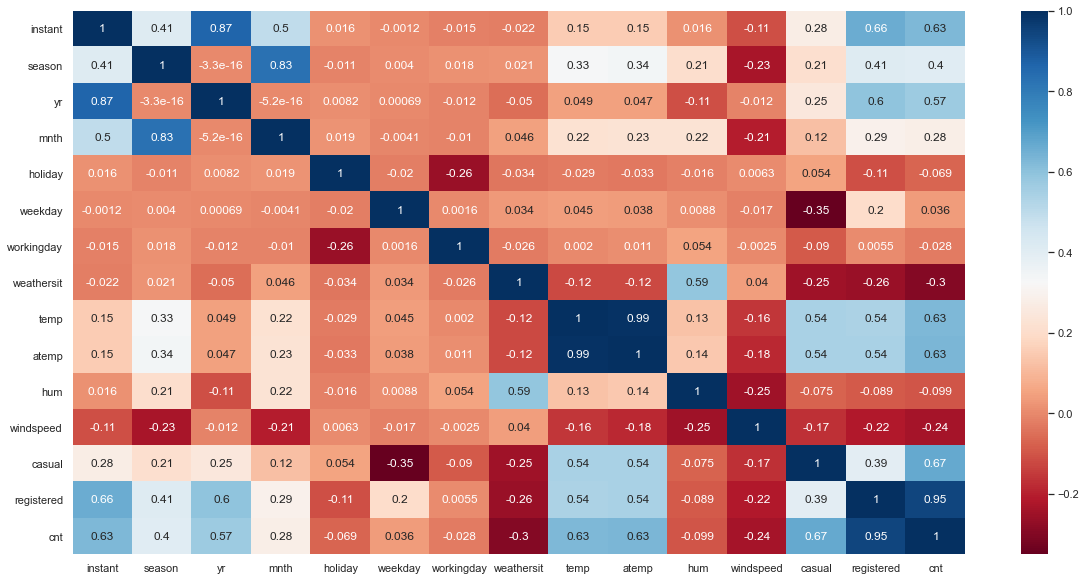

In [7]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(df.corr(), cmap="RdBu",annot=True)
plt.show()

* temp, atemp, casual and rgistered columns are greatly correlated with cnt.



# skewness of target variable

C:\Users\vsmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

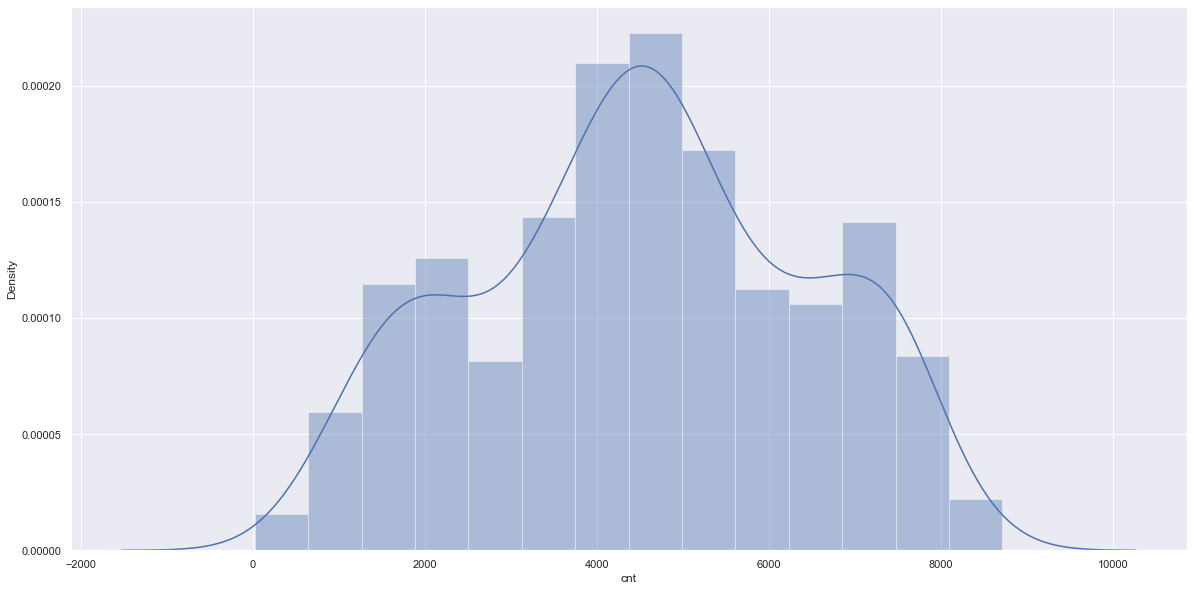

In [171]:
sns.distplot(df.cnt)

{'whiskers': [<matplotlib.lines.Line2D at 0x266075addc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2660787a4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x266075ada60>],
 'medians': [<matplotlib.lines.Line2D at 0x2660787ab80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2660787aee0>],
 'means': []}

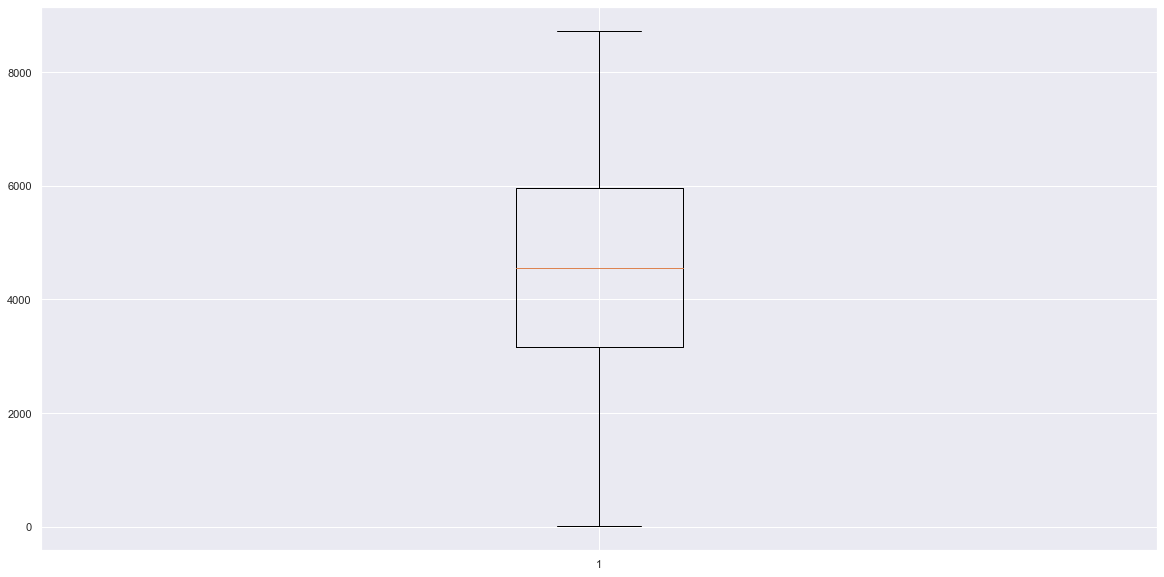

In [9]:
plt.boxplot(df.cnt)

<Figure size 1080x2160 with 0 Axes>

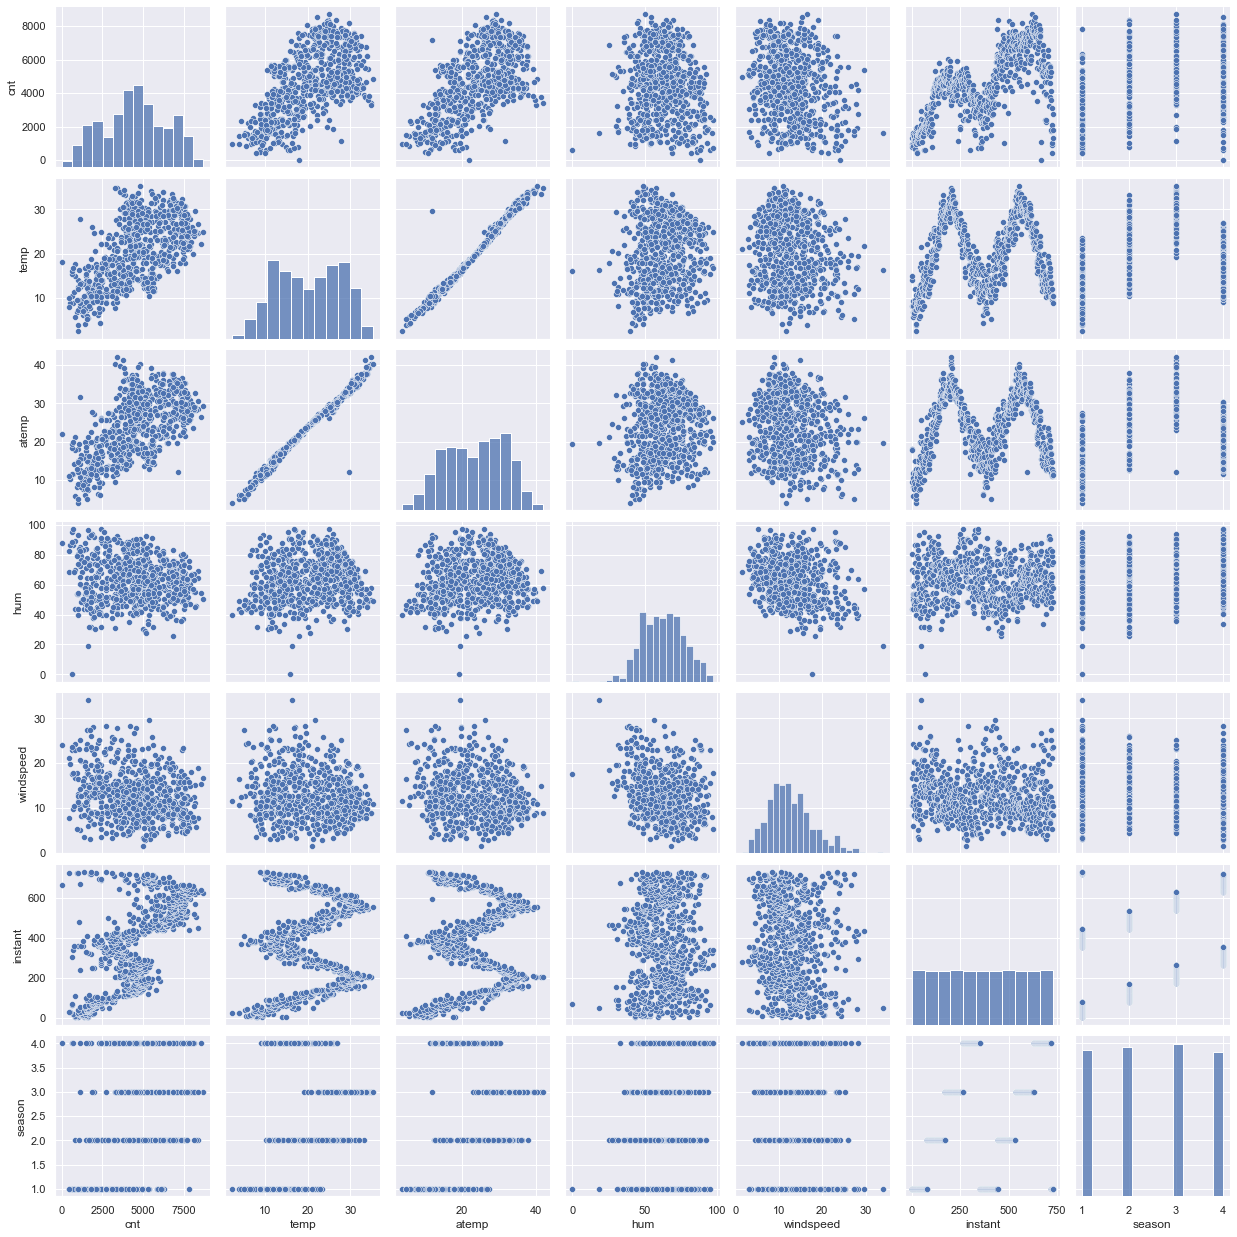

In [10]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed','instant','season'])
plt.show()

# Selection of dependant and independant variables

In [140]:
X = df.loc[:,['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       ]]
# without casual and registered columns

In [141]:
X

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518


* date is splitted so nat require dteday column

* casual and registered are perfectly correlated with cnt as casual + registered = cnt so not neccesity of that columns.

* instant is just numbering so it also escape.

* Followings are independant veriables as this are corelated with cnt.

In [142]:
y = df["cnt"]

In [143]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

# splitting of dataset

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

# 1. Logistic regression

In [145]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [146]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\vsmal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [147]:
pred = lr.predict(X_test)
pred

array([7534, 5905, 2933, 6879, 7335, 3292, 5923, 5115, 6591, 4541, 8362,
       4844, 4677, 7639,  705, 6544, 5515, 1685, 3613, 3761, 7582, 5423,
       6591, 1685, 2475, 2475, 5115, 6998, 7525, 5464, 5823, 7444, 4352,
       1115, 4585, 4788, 4940, 6234, 2802, 1815, 5698, 3239, 2425, 5362,
       6133, 5687, 2192, 4352, 5532, 1167, 7639, 4677, 2475, 5119,  754,
       6879, 5582, 4036, 2633, 5107, 4773, 4390, 1708, 5119, 5170, 5423,
       7804, 3403, 3239, 8714, 1944, 3974, 7040, 5585, 5905, 4649, 8362,
       6660, 4401, 5923, 7836, 5298, 4105, 4521, 5905, 4459, 6824, 5936,
       3956, 3613, 1550, 4475, 6207, 3351, 7693, 7804, 6883, 1416, 6624,
       1685, 5169, 6779, 1891, 4592, 5729, 2429, 2077, 2402, 3068,  981,
       4075, 4359, 5117, 6312, 4195, 1461, 4401, 2077, 3577, 6879, 7965,
       4708, 4186, 5298, 4401, 2034, 7605, 2077, 4891, 5464, 2425, 7375,
       3310, 6460, 5585, 3403, 2077, 3940, 3487, 8173, 4151, 4881, 2302,
       1650,  801,  754, 1529, 7282, 1815, 5611, 32

In [148]:
y_test.head()

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64

In [149]:
print("R2_score accuraccy: ",r2_score(y_test,pred))

R2_score accuraccy:  0.37465525069282013


# 2. Random forest regression

In [150]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [151]:
rfr =  RandomForestRegressor()
rfr.fit(X_train,y_train)
pred = rfr.predict(X_test)
print("R2_score accuraccy: ",r2_score(y_test,pred))

R2_score accuraccy:  0.8643211794394133


# 3. decision tree

In [152]:
from sklearn.tree import DecisionTreeRegressor

In [153]:
dfr=DecisionTreeRegressor(max_depth=8)
dfr.fit(X_train,y_train)
pred = dfr.predict(X_test)
print("R2_score accuraccy: ",r2_score(y_test,pred))

R2_score accuraccy:  0.7565059789967294


# MODEL 1

In [154]:
import pickle as pk

In [155]:
filename="kattru_model.pk"
pk.dump(rfr,open(filename,"wb"))
load_model= pk.load(open(filename,'rb'))
load_model.predict([[1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882]])

array([1161.76])

# Adding Casual and registered column

In [160]:
X1 = df.loc[:,['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','casual','registered'
       ]]

In [161]:
X1

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432


# train test split

In [162]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.4, random_state=100)

# Logistic regression

In [163]:
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [164]:
lr1=LogisticRegression()
lr1.fit(X_train1,y_train1)

C:\Users\vsmal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [165]:
pred = lr1.predict(X_test1)
pred

array([6591, 5115, 1685, 4401, 5115, 5323, 4401, 5115, 5511, 5115, 7148,
       7852, 5115, 7639, 3214, 8173, 4401, 3959, 5259, 5115, 5115, 1842,
       4484, 3214, 5115, 5729, 5115, 4401, 7641, 4401, 4401, 7691, 3974,
       1685, 3214, 4401, 4649, 7641, 1685, 5633, 5986, 6871, 5986, 6053,
       7691, 8714, 5115, 3974, 5729, 3351, 7639, 5115, 6234, 5923,  627,
       6207, 5115, 5117, 1685, 8362, 5323, 4401, 1685, 4401, 5115, 5115,
       7030, 5986, 7350, 7641,  627, 4195, 5115, 3117, 5115, 4649, 4401,
       7804, 5115, 5119, 5119, 4195, 5668, 4401, 7639, 3974, 7641, 5923,
       5323, 3214, 3959, 3351, 5115, 3974, 5668, 8173, 4649, 1685, 6871,
       3214, 8173, 4401, 1685, 4401, 5668, 3974, 3068, 2077, 6234,  627,
       3959, 6234, 6871, 7639, 3214, 1685, 3351,  605, 5986, 5115, 5409,
       5115, 5566, 5115, 5115, 5115, 7767, 3974, 5115, 6891, 6140, 5115,
       2077, 5115, 7335, 1685, 3068, 4036, 5986, 4401, 3068, 7350, 5668,
       1685, 6871, 1685, 3214, 7691, 3974, 5566, 39

In [166]:
print("R2_score accuraccy: ",r2_score(y_test1,pred))

R2_score accuraccy:  0.42386326845087585


# randomforest regression

In [167]:
rfr1 =  RandomForestRegressor()
rfr1.fit(X_train1,y_train1)
pred = rfr1.predict(X_test1)
print("R2_score accuraccy: ",r2_score(y_test1,pred))
rfr1

R2_score accuraccy:  0.9954043722586048


RandomForestRegressor()

# Decision tree regression

In [172]:
dfr1=DecisionTreeRegressor(max_depth=8)
dfr1.fit(X_train1,y_train1)
pred = dfr1.predict(X_test1)
print("R2_score accuraccy: ",r2_score(y_test1,pred))

R2_score accuraccy:  0.9823918669966343


# MODEL2

In [173]:
filename1="kattru1_model.pk"
pk.dump(rfr1,open(filename1,"wb"))
load_model1= pk.load(open(filename1,'rb'))
load_model1.predict([[1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654]])

array([862.66])

# Observations:
    
    * casual and registered are perfectly correlated with cnt as casual + registered = cnt so not neccesity of that columns.
    
    * Made model on both with and without this columns.
    
    * It is seen that accuracy get increased with adding this columns.
    
    * Used logistic regression, dicesion tree and random forest regression.
    
    * Got higher accuracy with random forest regression and with adding casual and resistered columns.
    
    * So we can use model2 for prediction.
    
    